# Chinese Word Segmentation (jieba)


## Important Steps

- Install `jieba` module

```
!pip install jieba
```

- import module

```
import jieba
import jieba.analyse
```

- initialize traditional Chinese dictionary
    - Download the traditional chinese dictionary from [`jieba-tw`](https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt)
    
```
jieba.set_dictionary(file_path)
```

- Add own project-specific dictionary

```
jieba.load_userdict(file_path)
```

- Add add-hoc words to dictionary

```
jieba.add_word(word, freq=None, tag=None)
```

- Remove words

```
jieba.del_word(word)
```

- Chinese stopwords (See [林宏任老師 GitHub](https://github.com/tomlinNTUB/Python/tree/master/%E4%B8%AD%E6%96%87%E5%88%86%E8%A9%9E)

    - `jieba.cut()` does not interact with stopword list
    - `jieba.analyse.set_stop_words(file_apth)`

- Word segmentation
    - `jieba.cut()` returns a `generator` object
    - `jieba.lcut()` resuts a `List` object
    
```
# full

jieba.cut(TEXT, cut_all=True)
jieba.lcut(TEXT, cut_all=True

# default
jieba.cut(TEXT, cut_all=False)
jieba.lcut(TEXT, cut_all=False)
```

- Keyword Extraction
    - The module uses the TF-IDF score to extract keywords
    - But how documents are defined in Jieba? Eahc list element in the input is a doc?

```
jieba.analyse.extract_tags(TEXT, topK=20, withWeight=False, allowPOS=())
```


    

## Demonstration

In [1]:
import jieba
from jieba import posseg

In [4]:
# set dictionary

jieba.set_dictionary('../../../RepositoryData/data/jiaba/dict.txt.jiebatw.txt/')
#jieba.load_userdict()

text = '據《日經亞洲評論》網站報導，儘管美國總統川普發起了讓美國製造業回歸的貿易戰，但包括電動汽車製造商特斯拉在內的一些公司反而加大馬力在大陸進行生產。另據高盛近日發布的一份報告指出，半導體設備和材料以及醫療保健領域的大多數公司實際上正擴大在大陸的生產，許多美國製造業拒絕「退出中國」。'

print(' '.join(jieba.cut(text, cut_all=False, HMM=True))+'\n')
print(' '.join(jieba.cut(text, cut_all=False, HMM=False))+'\n')
print(' '.join(jieba.cut(text, cut_all=True, HMM=True))+'\n')

text_pos = posseg.cut(text)
#print(type(text_pos))
for word, tag in text_pos:
    print(word+'/'+tag)

Building prefix dict from /Users/alvinchen/GoogleDrive/_MySyncDrive/RepositoryData/data/jiaba/dict.txt.jiebatw.txt ...
Loading model from cache /var/folders/0v/47nxlfjn26536t51wxj9j6q40000gn/T/jieba.ua8844a7107ddb26148eb46e710a94d97.cache
Loading model cost 0.421 seconds.
Prefix dict has been built successfully.


據 《 日經 亞洲 評論 》 網站 報導 ， 儘管 美國 總統 川普 發起 了 讓 美國 製造業 回歸 的 貿易戰 ， 但 包括 電動 汽車 製造商 特斯拉 在內 的 一些 公司 反而 加大 馬力 在 大陸 進行 生產 。 另據 高盛 近日 發布 的 一份 報告 指出 ， 半導體 設備 和 材料 以及 醫療 保健 領域 的 大多數 公司 實際 上 正 擴大 在 大陸 的 生產 ， 許多 美國 製造業 拒絕 「 退出 中國 」 。

據 《 日經 亞洲 評論 》 網站 報導 ， 儘管 美國 總統 川普 發起 了 讓 美國 製造業 回歸 的 貿易戰 ， 但 包括 電動 汽車 製造商 特斯拉 在內 的 一 些 公司 反而 加大 馬力 在 大陸 進行 生產 。 另 據 高盛 近日 發布 的 一 份 報告 指出 ， 半導體 設備 和 材料 以及 醫療 保健 領域 的 大 多 數 公司 實際 上 正 擴大 在 大陸 的 生產 ， 許多 美國 製造業 拒絕 「 退出 中國 」 。

據 《 日經 亞洲 評論 》 網站 報導 ， 儘管 美國 國總統 總統 川普 發起 了 讓美 美國 美國製 製造 製造業 造業 回歸 的 貿易 貿易戰 ， 但 包括 電動 汽車 車製 製造 製造商 商特 特斯拉 斯拉 在內 的 一 些 公司 反而 加大 大馬 馬力 在 大陸 進行 行生產 生產 。 另 據 高盛 近日 發布 的 一 份 報告 指出 ， 半導體 導體 設備 和 材料 以及 醫療 保健 領域 的 大 多 數 公司 實際 上 正 擴大 在 大陸 的 生產 ， 許多 美國 美國製 製造 製造業 造業 拒絕 「 退出 中國 」。

據/x
《/x
日經/x
亞洲/x
評論/x
》/x
網站/x
報導/x
，/x
儘管/x
美國/x
總統/x
川普/x
發起/x
了讓/v
美國/x
製造業/x
回歸/x
的/uj
貿易戰/x
，/x
但/c
包括/v
電動/x
汽車/x
製造商/x
特斯拉/nrt
在內/x
的/uj
一些/m
公司/n
反而/c
加大/v
馬力/x
在/p
大陸/x
進行/x
生產/x
。/x
另/r
據/p
高盛/nr
近日/t
發布/x
的/uj
一份/m
報告/x
指出/v
，/x
半導體/x
設備/x
和/c
材料/n
以及/c
醫療/x
保健/nr
領域/x
的/uj


In [7]:
# load stopwords
with open('../../../RepositoryData/data/stopwords/tomlinNTUB-chinese-stopwords.txt', 'r') as f:
    stopwords = [w.strip() for w in f.readlines()]

words1 = jieba.lcut(text, cut_all=True)
words2 = [w for w in words1 if w not in stopwords]

print(len(words1))
print(len(words2))
print(words2)

97
67
['日經', '亞洲', '評論', '網站', '報導', '美國', '國總統', '總統', '川普', '發起', '讓美', '美國', '美國製', '製造', '製造業', '造業', '回歸', '貿易', '貿易戰', '包括', '電動', '汽車', '車製', '製造', '製造商', '商特', '特斯拉', '斯拉', '在內', '公司', '加大', '大馬', '馬力', '大陸', '進行', '行生產', '生產', '高盛', '近日', '發布', '份', '報告', '指出', '半導體', '導體', '設備', '材料', '醫療', '保健', '領域', '數', '公司', '實際', '正', '擴大', '大陸', '生產', '美國', '美國製', '製造', '製造業', '造業', '拒絕', '「', '退出', '中國', '」。']


## Word Cloud

In [8]:
from collections import Counter

wf = dict(sorted(Counter(words2).items(), key=lambda x:x[1], reverse=True))


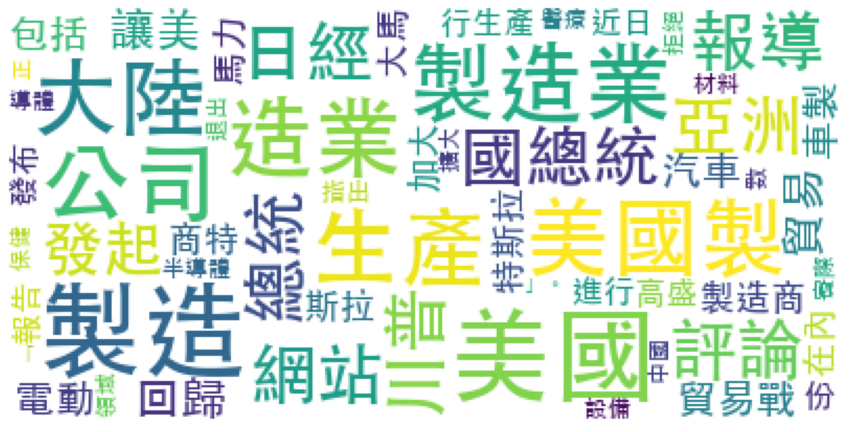

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(background_color='white',
               font_path='/System/Library/Fonts/STHeiti Medium.ttc',
               random_state=10,
               max_font_size=None,
               stopwords=['包括']) ## stopwords not work when wc.genreate_from_frequencies
wc.generate_from_frequencies(frequencies=wf)

plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
#wc.to_file(FILE_PATH)